In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat

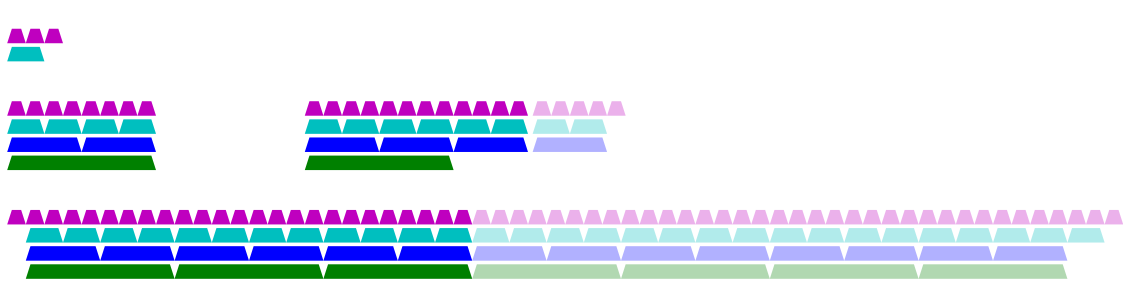

In [2]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_xlim(0,7125-5925)
ax.set_ylim(0,300)
ax.axis("off")

def plot_one(x, y, w, color="blue", alpha=1.0):
    # 台形をつくる、パラメータ：x, y, 幅、色、透過
    p = pat.Polygon(xy = [(x, y), (x+w, y), (x+w-5, y+16), (x+5, y+16)],
                    fc=color, alpha=alpha)
    ax.add_patch(p)

def plot_6ghz(y_base=0):
    # 6GHz専用関数 yの指定だけ
    basement = [20, 20, 20, 0]
    band_amount = [7, 14, 29, 60]
    widths = [160, 80, 40, 20]
    color = ["g", "b", "c", "m"]
    for i, y in enumerate([0, 20, 40, 60]):
        for j in range(band_amount[i]):
            al = 0.3 if basement[i]+widths[i]*j >= 6425-5925 else 1.0 #日本未対応は透過
            plot_one(basement[i]+widths[i]*j, y+y_base, widths[i], color[i], alpha=al)

def plot_5ghz(x_base=0, y_base=100, band_amount=[1, 2, 4, 8]):
    # 6GHz以外の関数、6GHzもこれでかけたけど
    # 5GHzは途切れるのでxの指定が必要

    widths = [160, 80, 40, 20]
    color = ["g", "b", "c", "m"]
    for i, y in enumerate([0, 20, 40, 60]):
        for j in range(band_amount[i]):
            al = 0.3 if x_base+widths[i]*j >= 5735-5170 else 1.0 #日本未対応は透過
            plot_one(widths[i]*j+x_base, y+y_base, widths[i], color[i], alpha=al)

        
    
plot_6ghz() # 6GHz
plot_5ghz(0, 120) # 5GHz (5.2)
plot_5ghz(5490-5170, 120, band_amount=[1, 3, 6, 12]) # 5GHz (5.3)
plot_5ghz(5735-5170, 120, band_amount=[0, 1, 2, 5]) # 5GHz (5.4)
plot_5ghz(0, 200, band_amount=[0,0,1,3]) # 2.4GHz